In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lidar = pd.read_csv('Dataset/bag9_course2_17-20/lidar.txt', sep=' ', header=None)
actions = pd.read_csv('Dataset/bag9_course2_17-20/actions.txt', sep=' ', header=None)
actions.columns= ['steering_angle', 'velocity']
print("actions ", actions.shape)
print("Lidar ",lidar.shape)


actions  (1192, 2)
Lidar  (1192, 1081)


In [70]:
def plot_vel():
    #fig, ax = plt.subplots(figsize=(16,10))
    sns.lineplot(data=actions['velocity'])

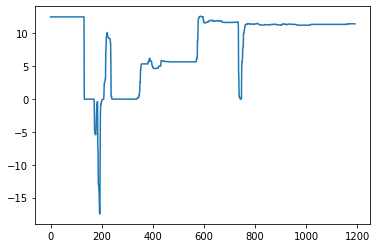

In [71]:
plot_vel()

actions  (1018, 2)
Lidar  (1018, 1081)


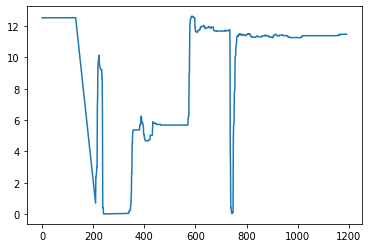

In [72]:
negative_vel = actions.loc[actions['velocity'] <= 0.0]
actions = actions.drop(negative_vel.index)
lidar = lidar.drop(negative_vel.index)
print("actions ", actions.shape)
print("Lidar ",lidar.shape)
plot_vel()

In [73]:
def write_output_to_csv():
    output = lidar.copy()
    output['velocity'] = actions['velocity'].copy()
    output['steering_angle'] = actions['steering_angle'].copy()
    output.to_csv(r'Dataset_refined/bag10.csv', index=False, header=True)

In [74]:
write_output_to_csv()

In [82]:
#Combine all bags
dataset = pd.read_csv('Dataset_refined/bag1.csv', sep=',')
dataset = dataset.append(pd.read_csv('Dataset_refined/bag3.csv', sep=','))
dataset = dataset.append(pd.read_csv('Dataset_refined/bag4.csv', sep=','))
dataset = dataset.append(pd.read_csv('Dataset_refined/bag5.csv', sep=','))
dataset = dataset.append(pd.read_csv('Dataset_refined/bag6.csv', sep=','))
dataset = dataset.append(pd.read_csv('Dataset_refined/bag7.csv', sep=','))
dataset = dataset.append(pd.read_csv('Dataset_refined/bag8.csv', sep=','))
dataset = dataset.append(pd.read_csv('Dataset_refined/bag9.csv', sep=','))

In [85]:
dataset.to_csv(r'Dataset_refined/complete.csv', index=False, header=True)